Notes:
Simulation with 1000 agents takes appx. 40 seconds.

To Do: Consider that individuals with higher level opf education enter the modelonly in later periods. Should correct for this in generating the descriptive statistics.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In this notebook we present descriptive statistics of a series of simulated samples with the soepy toy model.

Since soepy is closely aligned to the model in Blundell (2016). Therefore, we first discuss a baseline specification of the model, in which the parameter values are set close to the parameters estimated in the seminal paper:
- the constants in the wage process gamma_0 equal the coefficient values on b0, Blundell Table VIII, p. 1733
- the returns to experience in the wage process gamma_1 equal the coefficient values on gamma0, Blundell Table VIII, p. 1733
- the part-time experience accumulation parameter equals the coefficient on g(P), Blundell Table VIII, p. 1733,
- the experience depreciation parameter delta equals the coefffient values on delta, Blundell Table VIII, p. 1733,
- the disutility of part-time work parameter theta_p is rough average of the part-time coefficient values in Blundell Table IX, p. 1734,
- the disutility of full-time work parameter theta_f is rough average of the full-time coefficient values in Blundell Table IX, p. 1734,

In [2]:
import pandas as pd

In [16]:
data_frame_baseline = pd.read_csv('toy_model_sim_test_1000.csv', sep = '\t')

In [17]:
data_frame_baseline

,Identifier,Period,Identifier.1,Period.1,Years of Education,Choice,Systematic Wage,Period Wage N,Period Wage P,Period Wage F,Consumption Utility N,Consumption Utility P,Consumption Utility F,Flow Utility N,Flow Utility P,Flow Utility F
0,0,0,0,0,12,2,5.147946,14.829146,15.636876,62.846812,-0.141488,-0.075881,-0.022914,-0.141488,-0.083527,-0.025732
1,0,1,0,1,12,1,9.920092,12.671317,27.227483,2.928605,-0.141488,-0.055623,-0.127586,-0.141488,-0.061228,-0.143279
2,0,2,0,2,12,2,11.380368,6.557525,2.156647,19.205964,-0.141488,-0.230114,-0.044505,-0.141488,-0.253300,-0.049979
3,0,3,0,3,12,1,16.152514,32.819522,33.664191,4.005757,-0.141488,-0.049391,-0.107061,-0.141488,-0.054367,-0.120229
4,0,4,0,4,12,1,17.612791,6.614432,13.418960,4.901164,-0.141488,-0.082668,-0.095624,-0.141488,-0.090997,-0.107385
5,0,5,0,5,12,2,19.073067,11.070086,35.017058,257.668992,-0.141488,-0.048313,-0.010398,-0.141488,-0.053181,-0.011677
6,0,6,0,6,12,1,23.845213,99.662804,266.973732,91.754459,-0.141488,-0.015489,-0.018538,-0.141488,-0.017050,-0.020818
7,0,7,0,7,12,2,25.305490,19.340365,15.614972,36.033602,-0.141488,-0.075941,-0.031288,-0.141488,-0.083593,-0.035136
8,0,8,0,8,12,2,30.077635,40.733278,15.897737,10.274223,-0.141488,-0.075182,-0.063176,-0.141488,-0.082757,-0.070947
9,0,9,0,9,12,2,34.849781,18.270781,25.087089,13.686229,-0.141488,-0.058233,-0.053804,-0.141488,-0.064100,-0.060422


In [5]:
# Set period wage for non-employment equal to the benefits value set in the model spcification
data_frame_baseline['Period Wage N'] = 92.52

Descriptive statistics to look at:
- average part-time, full-time and nonemployment rate - ideally close to population rates, 60%, 27%, 3%
- frequency of each choice per period - ideally more often part-time in early periods, more full-time in later periods
- frequency of each choice over all periods for individuals with different levels of education - ideally, lower educated more often unemployed and in part-time jobs
- average period wages over all individuals - series for all periods
- average period wages series by education

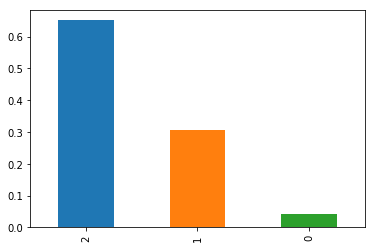

In [6]:
# Average non-employment, part-time, and full-time rates over all periods and individuals
data_frame_baseline['Choice'].value_counts(normalize=True).plot(kind = 'bar')
plt.show()

In [11]:
data_frame_baseline['Choice'].value_counts(normalize=True)

2    0.6515
1    0.3053
0    0.0432
Name: Choice, dtype: float64

In the baseline model, the rate of non-employed over all individuals and periods amounts to 4,3%. The part-time and full-time employment rates equal 30,5% and 65,2% respectively. For a perfectly calibrated simulation, we would wish to have a sligtly lower rate of part-time emoloyment and a sligtly higher rate of full-time employment.

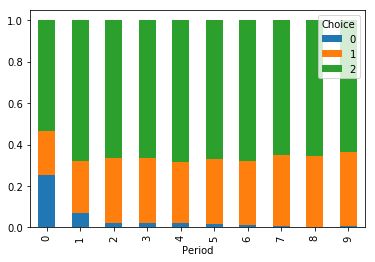

In [7]:
# Average non-employment, part-time, and full-time rates per period
data_frame_baseline.groupby(['Period'])['Choice'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True)

As far as the evolution of choices over all agents and periods is concerned, we first observe a declining tendency of individuals to be unemployed as desired in a perfectly calibrated simulation. Second individuals in our baseline simulation tend to choose full-time employment less often in the last three periods of the model. Rates of part-time employment experience a slight but steady increase over all periods. For a perfect calibration, full-time employment should stay roughly constant, while part-time employment should slightly decrease over time.

We note the high proportion of non-employment in the first period. 

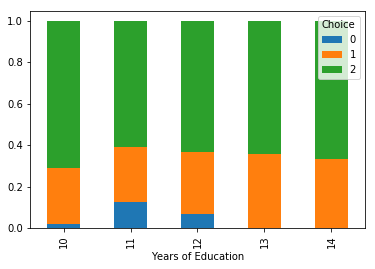

In [8]:
# Average non-employment, part-time, and full-time rates for individuals with different level of education
data_frame_baseline.groupby(['Years of Education'])['Choice'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True)

As should be expected, the higher the education level of the individuals the lower the observed tendency to be unemployed and to work part time.

We note a suprisingly low level of nonemployment among individuals with 10 years of education.

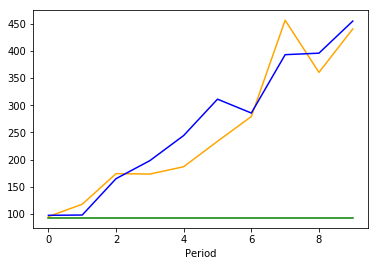

In [9]:
# Average wages for each period and choice

data_frame_baseline[data_frame_baseline['Choice'] == 1].groupby(['Period'])['Period Wage P'].mean().plot(kind='line', color='orange')
data_frame_baseline[data_frame_baseline['Choice'] == 2].groupby(['Period'])['Period Wage F'].mean().plot(kind='line', color='blue')
data_frame_baseline[data_frame_baseline['Choice'] == 0].groupby(['Period'])['Period Wage N'].mean().plot(kind='line', color='green')


The period wage of non-employment actually refers to the unemployment benefits individuals receive. The amount of the benefits is constant over time. Part-time and full-time wages rise as individuals gather more experience. However, in a well calibrated simulation, part-time would need to grow more slowly compared to the baseline model. 

In [12]:
# Average utility for each period and choice

data_frame_baseline[data_frame_baseline['Choice'] == 1].groupby(['Period'])['Utility P'].mean().plot(kind='line', color='orange')
data_frame_baseline[data_frame_baseline['Choice'] == 2].groupby(['Period'])['Period Wage F'].mean().plot(kind='line', color='blue')
data_frame_baseline[data_frame_baseline['Choice'] == 0].groupby(['Period'])['Period Wage N'].mean().plot(kind='line', color='green')



KeyError: 'Column not found: Utility P'

In [10]:
# Average wages for each period and choice and different levels of education
#data_frame_baseline.groupby(['Period', 'Choice', 'Years of Education'])['Period Wage P', 'Period Wage F'].mean()

Parameters to keep as in baseline specification:
- part-time experience accumulation g_s1,2,3
- experience depreciation delta

Parameters to change and expected changes:

Parameters in the systematic wage govern the choice between employment (either part-time, or full-time) and nonemployment. They do not determine the choice between part-time and full-time employment since the systematic wage is equal for both options.
- constnat in wage process gamma_0: lower/higher value of the coefficient implies that other components such as accumulated work experience and the productivity shock are relatively more/less important in determining the choice between employment. Increasing the constant for individuals of a certain education level, e.g., high, should result in these indiciduals working more often.
- return to experience gamma_1: lower value of the coefficient implies that accumulated work experience is less relevant in determining the wage in comparison to other factors such as the constant or the productivity shock. Higher coefficients should lead to agents persistently choosing to employment versus non-employment.

The productivity shock:
- productivity shock variances - the higher the variances, the more switching between occupational alternatives should be expected.

Risk aversion:
- risk aversion parameter mu (??)

The labor disutility parameters directly influence:
- benefits - for higher benefits individuals of all education levels would choose non-employment more often
- labor disutility for part-time theta_p - for a higher coefficient, individuals of all education levels would choose to work part-time more often
- labor disutility for full-time theta_f - for a higher coefficient, individuals of all education levels would choose to work part-time more often